Import 버전들 확인

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import sklearn as sklearn
import tensorflow as tensorflow
import matplotlib.pyplot as plt

print('Numpy Version', np.__version__)
print('Pandas Version', pd.__version__)
print('Matplotlib Version', matplotlib.__version__)
print('Scikit-Learn Version', sklearn.__version__)
print('Tensorflow Version', tensorflow.__version__)

Numpy Version 1.21.6
Pandas Version 1.3.5
Matplotlib Version 3.2.2
Scikit-Learn Version 1.0.2
Tensorflow Version 2.9.2


In [ ]:
%matplotlib inline

DATA 읽어오기

In [ ]:
raw_data = pd.read_excel('CERML_origin.xlsx')
print(raw_data)
feature_names = np.array(['Nnum', 'ed', 'Qe', 'Ecohe', 'EN', 'EA', 'I', 'rcov', 'rZ', 'Ne', 'N', 'dMN'])
#'Nnum', 'ed', 'Qe', 'Ecohe', 'EN', 'EA', 'I', 'rcov', 'rZ', 'Ne', 'N', 'dMN'
print(feature_names)

     M      G_Cl  Nnum    ed    Qe  Ecohe    EN    EA     I  rcov    rZ  Ne  \
0   Mn  0.795966     4 -0.83  1.24  -0.36  1.55 -0.50  7.43  1.39  0.23   5   
1   Fe  0.858026     4 -0.62  1.37  -3.15  1.83  0.15  7.90  1.32  0.22   6   
2   Co  1.150586     4 -1.01  0.91  -2.81  1.88  0.66  7.88  1.26  0.21   7   
3   Ni  1.829476     4 -1.17  0.77  -4.69  1.92  1.16  7.64  1.24  0.20   8   
4   Cu  1.902396     4 -1.50  0.71  -2.48  1.90  1.24  7.73  1.32  0.19  10   
..  ..       ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ..   
70   W -2.478654     0 -0.90  1.73  -4.03  2.36  0.82  7.98  1.62  0.59   4   
71  Os -1.067414     0 -1.17  1.14  -2.09  2.20  1.08  8.71  1.44  0.54   6   
72  Ir -0.004404     0 -0.94  0.60  -1.82  2.20  1.56  8.97  1.41  0.53   7   
73  Pt  1.471646     0 -1.52  0.50  -3.19  2.28  2.13  8.96  1.36  0.51   9   
74  Au  1.570000     0 -3.33  0.50  -1.24  2.54  2.31  9.23  1.36  0.49  10   

     N   dMN  
0   25  2.22  
1   26  2.32  
2   27

Data preprocessing

In [ ]:
print(raw_data)
data_cleaned = raw_data.iloc[:,2:] # input data들만 모은 array
print(data_cleaned)

     M      G_Cl  Nnum    ed    Qe  Ecohe    EN    EA     I  rcov    rZ  Ne  \
0   Mn  0.795966     4 -0.83  1.24  -0.36  1.55 -0.50  7.43  1.39  0.23   5   
1   Fe  0.858026     4 -0.62  1.37  -3.15  1.83  0.15  7.90  1.32  0.22   6   
2   Co  1.150586     4 -1.01  0.91  -2.81  1.88  0.66  7.88  1.26  0.21   7   
3   Ni  1.829476     4 -1.17  0.77  -4.69  1.92  1.16  7.64  1.24  0.20   8   
4   Cu  1.902396     4 -1.50  0.71  -2.48  1.90  1.24  7.73  1.32  0.19  10   
..  ..       ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ..   
70   W -2.478654     0 -0.90  1.73  -4.03  2.36  0.82  7.98  1.62  0.59   4   
71  Os -1.067414     0 -1.17  1.14  -2.09  2.20  1.08  8.71  1.44  0.54   6   
72  Ir -0.004404     0 -0.94  0.60  -1.82  2.20  1.56  8.97  1.41  0.53   7   
73  Pt  1.471646     0 -1.52  0.50  -3.19  2.28  2.13  8.96  1.36  0.51   9   
74  Au  1.570000     0 -3.33  0.50  -1.24  2.54  2.31  9.23  1.36  0.49  10   

     N   dMN  
0   25  2.22  
1   26  2.32  
2   27

여기서부터 Supervised Learning Part (SVM, Randomforest, NN)

Training set 나누기!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data_cleaned.astype(np.float)
y = raw_data.iloc[:,1].astype(np.float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 적당한 비율로 training과 test set을 나누는 부분

<ipython-input-9-f8b1be02ad96>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = data_cleaned.astype(np.float)
<ipython-input-9-f8b1be02ad96>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = raw_data.iloc[:,1].astype(np.float)


SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

fs = 30
fs1 = 18

In [ ]:
hyper_params_svr = {'gamma':np.random.normal(1, 0.5, 100000), 'C':np.random.normal(1, 0.5, 100000)} #근데 왜 감마랑 C를 저런 scale로 하는지 잘 모르겠음
# 좋은 hyperparameter를 찾기 위해 랜덤으로 미리 설정하는 모습
# np.random.normal(평균, 표준편차, 데이터 개수)

svr_tune = SVR(kernel = 'rbf') # kernel로 rbf를 사용,

g_search = RandomizedSearchCV(svr_tune, hyper_params_svr, cv=5, n_jobs=-1, random_state=42)

g_search.fit(x_train, y_train); # 우리가 만든 training data set으로 머신러닝 돌리는 부분!

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 189, in skle

In [ ]:
print('Best Estimator ', g_search.best_estimator_) # 위의 radomized search로 최고의 hyperparameter를 찾음!

Best Estimator  SVR(C=0.9125733461491674, gamma=0.10586768712130834)


In [ ]:
best_C = g_search.best_estimator_.C # 앞서 찾은 최고의 C를 넣어줌
best_gamma = g_search.best_estimator_.gamma # 앞서 찾은 최고의 감마를 넣어줌

svr_rbf = SVR(kernel='rbf', C=best_C, gamma=best_gamma) # 앞서 찾은 최고의 hyperparameter 값으로 설정해줌

In [ ]:
y_svr = svr_rbf.fit(x_train, y_train) # 최고의 parameter로 다시 학습시키기!

In [ ]:
predict_svr_train = y_svr.predict(x_train) # x_train를 넣어본 output
predict_svr = y_svr.predict(x_test) # x_test를 넣어본 output

print('Score on training set: ', y_svr.score(x_train, y_train))
print('Score on test set: ', y_svr.score(x_test, y_test))

Score on training set:  0.9405221733091422
Score on test set:  0.7206356583931572


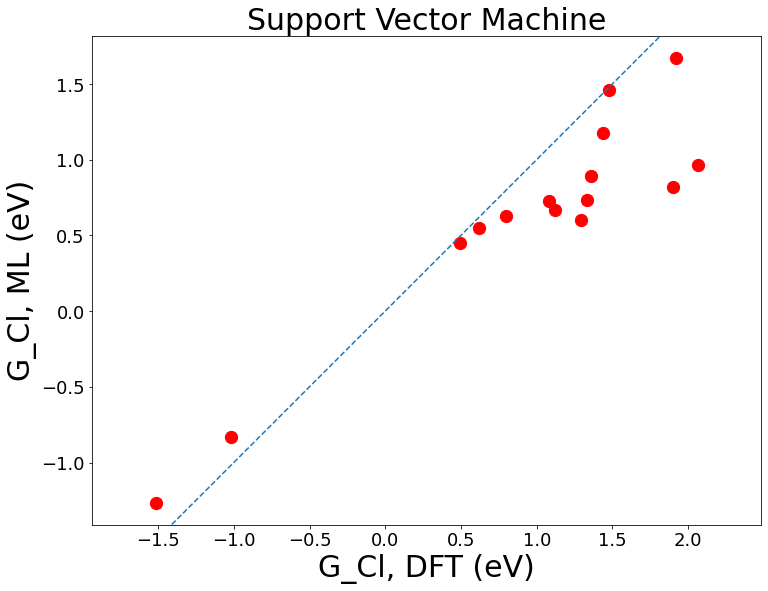

In [ ]:
plt.figure(figsize=(12,9))

plt.scatter(y_test, predict_svr, color = 'r', s=150) # y_test가 real value, predic_svr이 학습한 data로 넣어본 value
plt.title('Support Vector Machine', fontsize=fs)
plt.xlabel('G_Cl, DFT (eV)', fontsize=fs)
plt.ylabel('G_Cl, ML (eV)', fontsize=fs)
plt.xticks(fontsize=fs1)
plt.yticks(fontsize=fs1)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000,1000], linestyle='dashed');

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
hyper_params_rdf = {'n_estimators':np.arange(1, 25, 1)} # 아마 paramter의 개수가 tree의 개수인가...?

rdf_tune = RandomForestRegressor()
g_search_rdf = RandomizedSearchCV(rdf_tune, hyper_params_rdf, cv=5, n_jobs=-1, random_state=42)
g_search_rdf.fit(x_train, y_train) # 최고의 hyperparamter를 찾기 위한 학습!

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   random_state=42)

In [ ]:
print('Best Estimator ', g_search_rdf.best_estimator_) # 최고의 hyperparameter 찾음!

Best Estimator  RandomForestRegressor(n_estimators=12)


In [ ]:
estimators = g_search_rdf.best_estimator_.n_estimators # 그 숫자를 estimators라는 변수에 대입!

In [ ]:
regressor = RandomForestRegressor(n_estimators=estimators, random_state=42) # 최고의 개수로 다시 설정
regressor.fit(x_train, y_train); # 최고의 개수로 학습!

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_train = regressor.predict(x_train) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
y_pred = regressor.predict(x_test) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

print('Score on training set:', regressor.score(x_train, y_train))
print('Score on test set:', regressor.score(x_test, y_test))

r2_rdf_train = r2_score(y_train, y_pred_train) # rdf에서 train set r2 점수
r2_rdf_test = r2_score(y_test, y_pred) # rdf에서 test set r2 점수
print('R^2 score_train: ',r2_rdf_train)
print('R^2 score_test: ',r2_rdf_test)

Score on training set: 0.9885710971750143
Score on test set: 0.9270540172085491
R^2 score_train:  0.9885710971750143
R^2 score_test:  0.9270540172085491


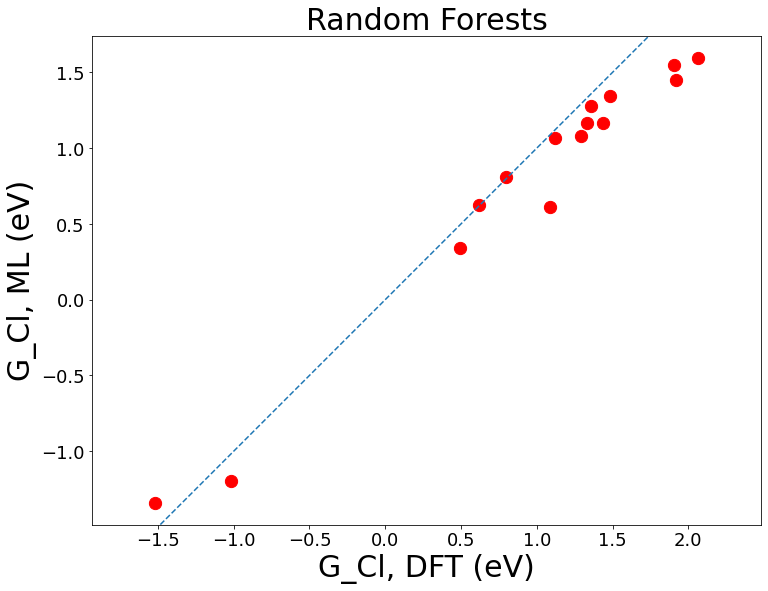

In [ ]:
plt.figure(figsize=(12,9))

plt.scatter(y_test, y_pred, color='r', s=150) # pairity plot 그리기!!
plt.title('Random Forests', fontsize=fs)
plt.xlabel('G_Cl, DFT (eV)', fontsize=fs)
plt.ylabel('G_Cl, ML (eV)', fontsize=fs)
plt.xticks(fontsize=fs1)
plt.yticks(fontsize=fs1)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000], linestyle='dashed');

2개 MSE랑 R^2 구해서 비교해보는 부분!

In [ ]:
mse_rdf_train = mean_squared_error(y_train, y_pred_train) # rdf에서 train set 에러
mse_rdf_test = mean_squared_error(y_test, y_pred) # rdf에서 test set 에러

mse_svr_train = mean_squared_error(y_train, predict_svr_train) # svr에서 train set 에러
mse_svr_test = mean_squared_error(y_test, predict_svr) # svr에서 test set 에러

print(mse_rdf_test)
print(mse_svr_test)

r2_rdf_train = r2_score(y_train, y_pred_train) # rdf에서 train set r2 점수
r2_rdf_test = r2_score(y_test, y_pred) # rdf에서 test set r2 점수

r2_svr_train = r2_score(y_train, predict_svr_train) # svr에서 train set r2 점수
r2_svr_test = r2_score(y_test, predict_svr) # svr에서 test set r2 점수

0.06985063947082262
0.26750997326846987


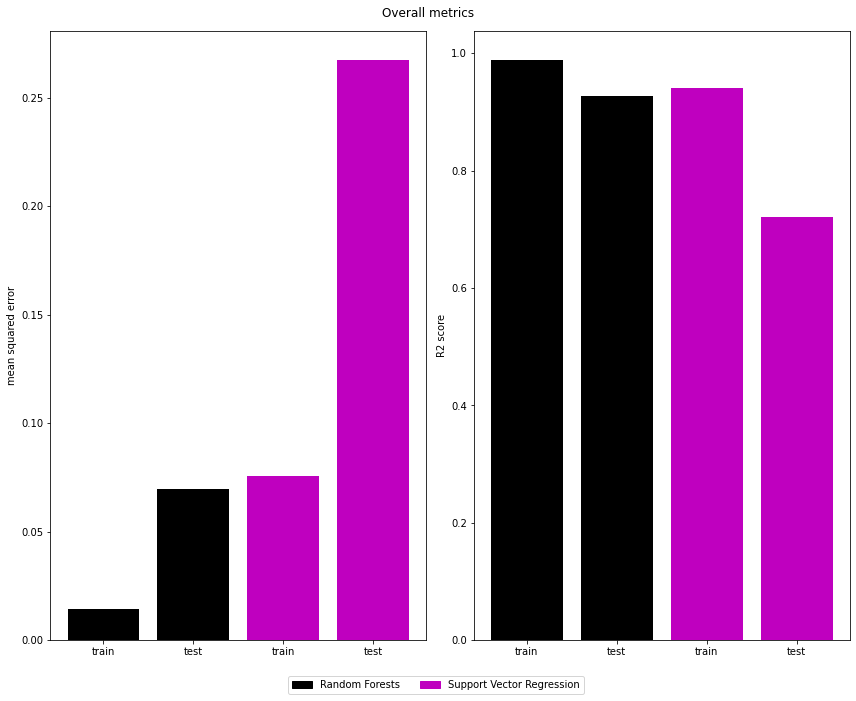

In [ ]:
import matplotlib.patches as mpatches

ann = mpatches.Patch(color='k', label='Random Forests')
svr = mpatches.Patch(color='m', label='Support Vector Regression')

names = ['train', 'test', 'train', 'test']
pos = range(len(names))
colors = ['k', 'k', 'm', 'm']
rotation = 0

plt.figure(figsize=(12,9))
plt.suptitle('Overall metrics', y=1.02)
plt.subplot(121)
plt.bar(pos, [mse_rdf_train, mse_rdf_test, mse_svr_train, mse_svr_test], color=colors)
plt.xticks(pos, names, rotation=rotation)
plt.ylabel('mean squared error')

plt.subplot(122)
plt.bar(pos, [r2_rdf_train, r2_rdf_test, r2_svr_train, r2_svr_test], color=colors)
plt.xticks(pos, names, rotation=rotation)
plt.ylabel('R2 score')

plt.tight_layout()
plt.legend(loc='upper center', handles=[ann, svr], ncol=3, bbox_to_anchor=(-0.1, -0.05));

여기서부터는 NN!

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()

In [ ]:
model = keras.Sequential([
    layers.Dense(73, activation='relu',
    input_shape=[x_train.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(73, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(73, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

In [ ]:
model.compile(loss='mae', optimizer='rmsprop');

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 73)                949       
                                                                 
 dropout (Dropout)           (None, 73)                0         
                                                                 
 dense_1 (Dense)             (None, 73)                5402      
                                                                 
 dropout_1 (Dropout)         (None, 73)                0         
                                                                 
 dense_2 (Dense)             (None, 73)                5402      
                                                                 
 dropout_2 (Dropout)         (None, 73)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [ ]:
model.fit(x_train, y_train, epochs=300, validation_split = 0.1, verbose=0); # validation dataset으로 사용할 비율 정해서 딥러닝

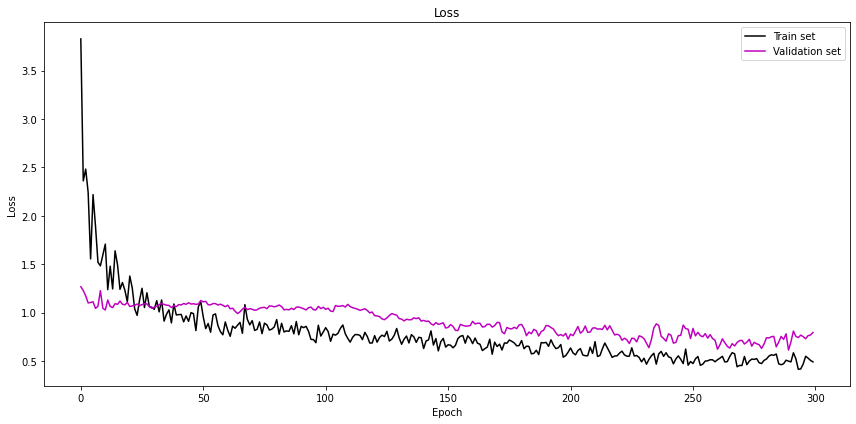

In [ ]:
plt.figure(figsize=(12,6))

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model.history.epoch, np.array(model.history.history['loss']),
        'k', label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history
['val_loss']), 'm', label='Validation set')
plt.legend()

plt.tight_layout()

In [ ]:
predict_on_train = model.predict(x_train).flatten()
predict_on_test = model.predict(x_test).flatten()

print('Score on training set:', r2_score(y_train, predict_on_train))
print('Score on test set:', r2_score(y_test, predict_on_test))

1/1 [==============================] - 0s 20ms/step
Score on training set: 0.6694274964105005
Score on test set: 0.5663137769954473


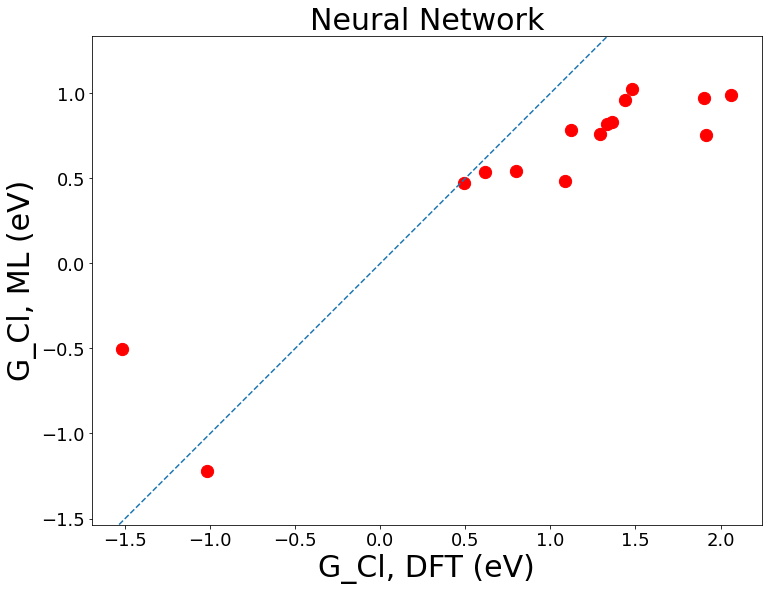

In [ ]:
plt.figure(figsize=(12,9))

plt.scatter(y_test, predict_on_test, color ='r', s = 150)
plt.title('Neural Network', fontsize=fs)
plt.xlabel('G_Cl, DFT (eV)', fontsize=fs)
plt.ylabel('G_Cl, ML (eV)', fontsize=fs)
plt.xticks(fontsize=fs1)
plt.yticks(fontsize=fs1)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000,1000], linestyle='dashed');

Feature Importance Search

In [ ]:
hyper_params_rdf = {'n_estimators':np.arange(1, 25, 1)} # 아마 paramter의 개수가 tree의 개수인가...?

rdf_tune = RandomForestRegressor()
g_search_rdf = RandomizedSearchCV(rdf_tune, hyper_params_rdf, cv=5, n_jobs=-1, random_state=42)
g_search_rdf.fit(x_train, y_train) # 최고의 hyperparamter를 찾기 위한 학습!

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   random_state=42)

In [ ]:
print('Best Estimator ', g_search_rdf.best_estimator_) # 최고의 hyperparameter 찾음!

Best Estimator  RandomForestRegressor(n_estimators=19)


In [ ]:
estimators = g_search_rdf.best_estimator_.n_estimators # 그 숫자를 estimators라는 변수에 대입!

In [ ]:
regressor = RandomForestRegressor(n_estimators=estimators, random_state=42) # 최고의 개수로 다시 설정
regressor.fit(x_train, y_train); # 최고의 개수로 학습!

In [ ]:
y_pred_train = regressor.predict(x_train) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
y_pred = regressor.predict(x_test) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

print('Score on training set:', regressor.score(x_train, y_train))
print('Score on test set:', regressor.score(x_test, y_test))

Score on training set: 0.9925652604822129
Score on test set: 0.9379673860037967


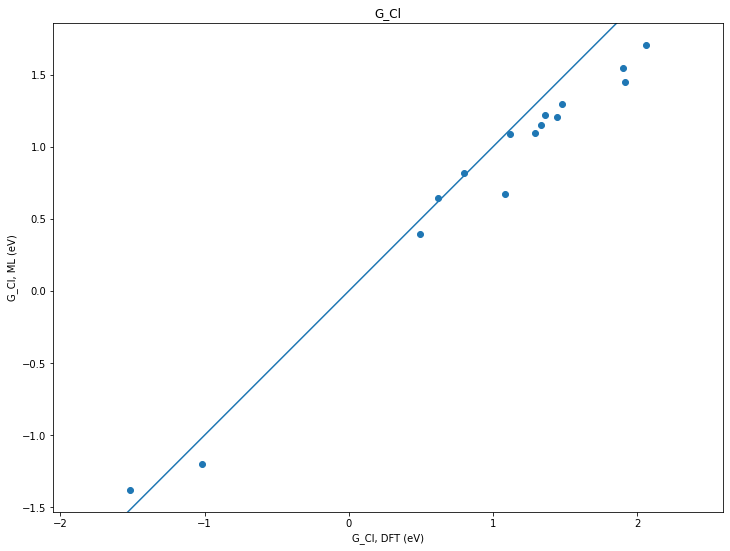

In [ ]:
plt.figure(figsize=(12,9))

plt.scatter(y_test, y_pred) # pairity plot 그리기!!
plt.title('G_Cl')
plt.xlabel('G_Cl, DFT (eV)')
plt.ylabel('G_Cl, ML (eV)')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000]);

In [ ]:
from sklearn.feature_selection import SelectFromModel

select_features = SelectFromModel(RandomForestRegressor(n_estimators=estimators))
# 앞에서 구한 최고의 parameter 사용
select_features.fit(x_train, y_train)
selected_features = x_train.columns[(select_features.get_support())] # 가장 중요한 feature들을 알려줌!

print(selected_features)

Index(['ed', 'rcov', 'Ne'], dtype='object')


Text(0.5, 0, 'Feature Importance')

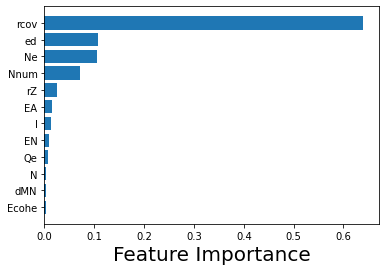

In [ ]:
sort = regressor.feature_importances_.argsort()
plt.barh(feature_names[sort], regressor.feature_importances_[sort])
plt.xlabel("Feature Importance", fontsize='20')

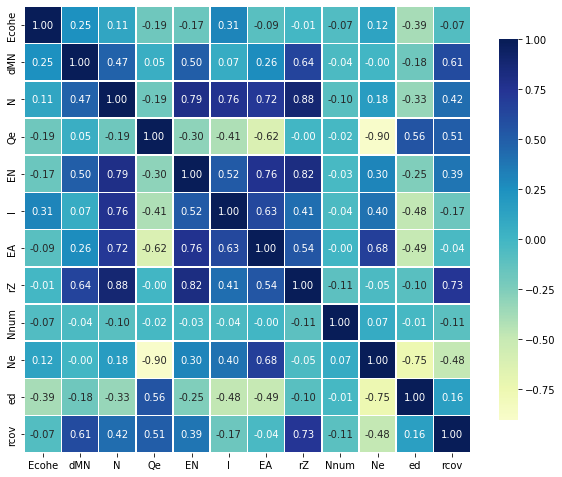

In [ ]:
import seaborn as sns

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();

correlation_heatmap(x_train[feature_names[sort]])